# 実行前に必ずハードウェアアクセラレーターを「GPU」にすること！！！

編集→ノートブックの設定

やらないと2時間以上かかります！

In [8]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils as np_utils

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# データを読み込む
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:
# モデルを定義
# 多層のCNNを構築

model = Sequential()
# padding=sameはフィルタによって小さくなった画像に対して、フィルタ分を補うようにゼロパディングする
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
# cinv2D→畳み込み層
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# MaxPooling→プーリング層
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 全結合層の前なのでFlattenで平滑化
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
# 出力層
model.add(Activation('softmax'))

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 3.9833 - accuracy: 0.0868 - val_loss: 3.3850 - val_accuracy: 0.1969
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 3.3374 - accuracy: 0.1975 - val_loss: 3.0051 - val_accuracy: 0.2654
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 3.0328 - accuracy: 0.2538 - val_loss: 2.8256 - val_accuracy: 0.3053
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.8466 - accuracy: 0.2902 - val_loss: 2.6119 - val_accuracy: 0.3478
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.7071 - accuracy: 0.3186 - val_loss: 2.4735 - val_accuracy: 0.3718
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.5833 - accuracy: 0.3418 - val_loss: 2.4074 - val_accuracy: 0.3830
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.4993 - accuracy: 0.3577 - val_loss: 2.4342 - val_accuracy

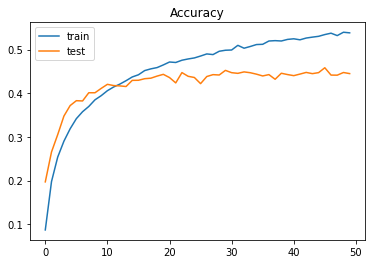

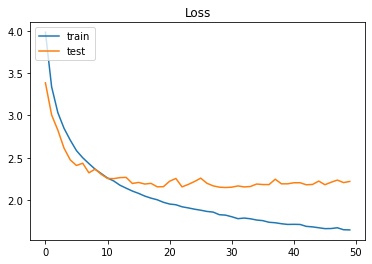

In [10]:
# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    # verbose = 1 はログを表示する　verbose = 0 はログを表示しない
    verbose=1,
    validation_data=(X_test, y_test))

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
X_train.shape

(50000, 32, 32, 3)

学習した重みデータの保存

In [6]:
# 重みデータの保存
# cifar10-weight.h5 という名前でデータを保存しよう
model.save_weights('cifar10-weight.h5')

In [ ]:
import cv2
import numpy as np

labels = ['飛行機', '自動車', '鳥', '猫', '鹿', '犬', '蛙', '馬', '船', 'トラック']
im_size = 32 * 32 * 3

# モデルデータの読み込み
model.load_weights('cifar10-weight.h5')

画像を読み込ませ、学習結果を確認

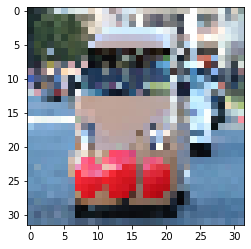

In [ ]:
# 自分で用意したファイルの場合は以下ファイル名を変更する
im = cv2.imread('anpanman.jpg')
# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

In [ ]:
# imのデータサイズを確認
im.shape

(32, 32, 3)

In [ ]:
# 予測する
r = model.predict(np.array([im]), batch_size = 32, verbose = 1)
res = r[0]

# resの内容を表示
print(res)

1/1 [==============================] - 0s 15ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# 結果を表示
for i, acc in enumerate(res):
    # i=index acc=resから1つ分取り出した要素
    print(labels[i], '=', int(acc * 100))
print('---')

# argmax→配列の中の最大値のインデックスを取得する
print('予測した結果＝',labels[res.argmax()])

飛行機 = 0
自動車 = 100
鳥 = 0
猫 = 0
鹿 = 0
犬 = 0
蛙 = 0
馬 = 0
船 = 0
トラック = 0
---
予測した結果＝ 自動車
